<a href="https://colab.research.google.com/github/sagihuja/projects/blob/main/SH_wine_classification_project_2404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# For transformations and predictions
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import warnings
# from scipy.optimize import curve_fit
# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

# For the tree visualization
import pydot
from IPython.display import Image

#from sklearn.externals.six import StringIO
from io import StringIO
import io
!pip install pydot
import pydot
from IPython.display import Image

# For the dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif

# For scoring
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score


# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

from imblearn.ensemble import BalancedRandomForestClassifier
from pickle import FALSE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
url = 'https://drive.google.com/file/d/1JcbLv6rdoEZqY38uZgoh_Jw5ZmYWgsVn'
gdd.download_file_from_google_drive(
    url.split('/')[-1], './winequalityN.csv')

wine = pd.read_csv("winequalityN.csv")
wine.head(6)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
# def test_df(df, target='quality', max_samples=None):
#     X = df.copy().drop(columns=target)
#     y = df[target]

#     if y.isna().sum():
#         raise Exception(f'cannot use "{target}" as the target variable, because it has null values')
# #don't forget to change the function!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#     if max_samples is None:
#         max_samples = np.log(len(X))
#         max_samples = max_samples / (max_samples+0.25)
#         print('max_samples =', round(max_samples,2))

#     missing_columns = X.isna().sum()
#     for col in missing_columns[missing_columns>0].index:
#         print('filling', col)
#         X[col + '_is_missing'] = X[col].isna()
#         if X[col].dtype in ['object', 'string', 'category', 'int']:
#             print('filling', col, 'as categorical')
#             X[col] = X[col].fillna(X[col].mode())
#             # X_col = X[col]
#             # X.loc[X[col].isna(), col] = X[col].mode()[0]
#         else:
#             print('filling', col, 'as numerical')
#             X[col] = X[col].fillna(X[col].mean())

#     for col in X.select_dtypes(['object', 'string', 'category', 'int']):
#         #print(col)
#         X[col] = X[col].astype('category').cat.codes


#     X_train, X_test, y_train, y_test = split(X, y, train_size=0.80, 
#                                                     test_size=0.20,
#                                                     shuffle=True,
#                                                     random_state=555555 ,
#                                                     stratify=y)

#     p_index=y_train[y_train=='premium'].index
#     p=X_train.loc[p_index]
#     n1=pd.concat([p]*10)
#     X_train = pd.concat([X_train, n1])
#     y_train = y_train.loc[X_train.index]

#     # clf.fit(X_train, y_train)   
   
#     # ros = RandomOverSampler(random_state=42)
#     # X_train, y_train = ros.fit_resample(X, y)
#     # print(sorted(Counter(y_train).items()))

#     print('training')
#     # print(y_train.value_counts())
#     print()
#     # print(y_test.value_counts())
#     # model = BalancedRandomForestClassifier()
#     model = RandomForestClassifier(oob_score=True, max_samples=max_samples, n_estimators=100)
#     print(sorted(Counter(y_train).items()))
#     #model = DecisionTreeClassifier()

#     # return X_train, y_train
    
#     def evaluate(
#         model, 
#         X, 
#         y, 
#         stage, 
#         proba=True, 
#         pairplot=True, 
#         pairplot_max_samples=500,
#         pairplot_max_features=6,
#         ):
#         if proba:
#             y_pred = pd.DataFrame(
#                      data=model.predict_proba(X), 
#                      index=X.index,
#                      columns=model.classes_
#                      )
#             #print(y_pred)
    
#             loss = log_loss(y, y_pred)
#             y_pred_labels = y_pred.idxmax(axis=1)

#             print(f'loss: {loss:.4f}')
#         else:
#             y_pred = pd.DataFrame(
#                      data=model.predict(X), 
#                      index=X.index,
#                      columns=[y.name]
#                      )
#             y_pred_labels = model.predict(X)
        
#         print(classification_report(y, y_pred_labels, target_names=model.classes_))
#         print()

#         if pairplot:
#             # remove _is_missing columns
#             relevant_columns = X.columns[~X.columns.str.endswith('_is_missing')]
#             if pairplot_max_features:
#                 feature_importances = pd.Series(
#                     model.feature_importances_, 
#                     index=model.feature_names_in_
#                     ).sort_values().tail(pairplot_max_features)
                
#                 print("dropping less important features from pairplot")
#                 print(relevant_columns)
#                 relevant_columns = relevant_columns[relevant_columns.isin(feature_importances.index)] 
#                 print(relevant_columns)

#             errors_df = X[relevant_columns]
#             errors_df = errors_df.assign(**{target:y, 'pred':y_pred_labels})
#             errors_df = errors_df.assign(confusion=errors_df[target] + '-' + errors_df.pred)

#             if pairplot_max_samples:
#                 errors_df = errors_df.sample(pairplot_max_samples)

#             sns.pairplot(
#                 data=errors_df,
#                 hue='confusion'
#                 )
#             plt.savefig(f'{stage}.jpg')
#             plt.close()  # prevents figure from being displayed when code cell is executed


#     def fit_evaluate(model, X_train, y_train, X_test, y_test, pairplot=False):

#         model.fit(X_train, y_train)
    
#         print()
#         print('TRAIN:')
#         print(y_train.value_counts())
#         evaluate(model, X_train, y_train, 'train', proba=True, pairplot=pairplot)

#         print()
#         print('TEST:')
#         print(y_test.value_counts())
#         evaluate(model, X_test, y_test, 'test', proba=True, pairplot=pairplot)

#         plt.figure(figsize=(20,30))
#         plt.subplot(3,1,1)
#         feature_importances = pd.Series(
#             model.feature_importances_, 
#             index=model.feature_names_in_
#             ).sort_values().tail(12)
#         feature_importances.plot.barh()
    
#         if pairplot:
#             plt.subplot(3,1,2)
#             plt.title('Train confusion')
#             plt.imshow(mpimg.imread('train.jpg'))
        
#             plt.subplot(3,1,2)
#             plt.title('Test confusion')
#             plt.imshow(mpimg.imread('test.jpg'))

#     return fit_evaluate(model, X_train, y_train, X_test, y_test)
#     # return model, y_test, y_test_pred

In [ ]:
def test_df(df, target='quality', max_samples=None):
    X = df.copy().drop(columns=target)
    y = df[target]

    if y.isna().sum():
        raise Exception(f'cannot use "{target}" as the target variable, because it has null values')
#don't forget to change the function!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    if max_samples is None:
        max_samples = np.log(len(X))
        max_samples = max_samples / (max_samples+0.25)
        print('max_samples =', round(max_samples,2))

    missing_columns = X.isna().sum()
    for col in missing_columns[missing_columns>0].index:
        print('filling', col)
        X[col + '_is_missing'] = X[col].isna()
        if X[col].dtype in ['object', 'string', 'category', 'int']:
            print('filling', col, 'as categorical')
            X[col] = X[col].fillna(X[col].mode())
            # X_col = X[col]
            # X.loc[X[col].isna(), col] = X[col].mode()[0]
        else:
            print('filling', col, 'as numerical')
            X[col] = X[col].fillna(X[col].mean())

    for col in X.select_dtypes(['object', 'string', 'category', 'int']):
        #print(col)
        X[col] = X[col].astype('category').cat.codes


    X_train, X_test, y_train, y_test = split(X, y, train_size=0.80, 
                                                    test_size=0.20,
                                                    shuffle=True,
                                                    random_state=555555 ,
                                                    stratify=y)

    # p_index=y_train[y_train=='premium'].index
    # p=X_train.loc[p_index]
    # n1=pd.concat([p]*10)
    # X_train = pd.concat([X_train, n1])
    # y_train = y_train.loc[X_train.index]
    
    print('training')
    print()
    model = RandomForestClassifier(oob_score=True, max_samples=max_samples, n_estimators=100)
    # return X_train, y_train
    
    def evaluate(
        model, 
        X, 
        y, 
        stage, 
        proba=True, 
        pairplot=True, 
        pairplot_max_samples=500,
        pairplot_max_features=6,
        ):
        if proba:
            y_pred = pd.DataFrame(
                     data=model.predict_proba(X), 
                     index=X.index,
                     columns=model.classes_
                     )
      
            loss = log_loss(y, y_pred)
            y_pred_labels = y_pred.idxmax(axis=1)

            print(f'loss: {loss:.4f}')
        else:
            y_pred = pd.DataFrame(
                     data=model.predict(X), 
                     index=X.index,
                     columns=[y.name]
                     )
            y_pred_labels = model.predict(X)
        
        print(classification_report(y, y_pred_labels, target_names=model.classes_))
        print()

        if pairplot:
            # remove _is_missing columns
            relevant_columns = X.columns[~X.columns.str.endswith('_is_missing')]
            if pairplot_max_features:
                feature_importances = pd.Series(
                    model.feature_importances_, 
                    index=model.feature_names_in_
                    ).sort_values().tail(pairplot_max_features)
                
                print("dropping less important features from pairplot")
                print(relevant_columns)
                relevant_columns = relevant_columns[relevant_columns.isin(feature_importances.index)] 
                print(relevant_columns)

            errors_df = X[relevant_columns]
            errors_df = errors_df.assign(**{target:y, 'pred':y_pred_labels})
            errors_df = errors_df.assign(confusion=errors_df[target] + '-' + errors_df.pred)

            if pairplot_max_samples:
                errors_df = errors_df.sample(pairplot_max_samples)

            sns.pairplot(
                data=errors_df,
                hue='confusion'
                )
            plt.savefig(f'{stage}.jpg')
            plt.close()  # prevents figure from being displayed when code cell is executed


    def fit_evaluate(model, X_train, y_train, X_test, y_test, pairplot=True):

        model.fit(X_train, y_train)
    
        print()
        print('TRAIN:')
        print(y_train.value_counts())
        evaluate(model, X_train, y_train, 'train', proba=True, pairplot=pairplot)

        print()
        print('TEST:')
        print(y_test.value_counts())
        evaluate(model, X_test, y_test, 'test', proba=True, pairplot=pairplot)

        plt.figure(figsize=(20,30))
        plt.subplot(3,1,1)
        feature_importances = pd.Series(
            model.feature_importances_, 
            index=model.feature_names_in_
            ).sort_values().tail(12)
        feature_importances.plot.barh()
    
        if pairplot:
            plt.subplot(3,1,2)
            plt.title('Train confusion')
            plt.imshow(mpimg.imread('train.jpg'))
        
            plt.subplot(3,1,2)
            plt.title('Test confusion')
            plt.imshow(mpimg.imread('test.jpg'))

    return fit_evaluate(model, X_train, y_train, X_test, y_test)
    # return model, y_test, y_test_pred

In [ ]:
wine.loc[wine['quality'] < 7, 'quality'] = 0.99999999
wine.loc[wine['quality'] > 6, 'quality'] = 999999
df=wine.replace(to_replace =["white", "red",0.99999999,999999], 
                            value =[0,1,'not_premium','premium'])

df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,not_premium
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,not_premium
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,not_premium
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not_premium
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not_premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,not_premium
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,not_premium
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,not_premium
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,not_premium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


###There are only 50 nulls (less then 1%), therefore we decided to drop them

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int64  
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


max_samples = 0.97
training


TRAIN:
not_premium    4153
premium        1017
Name: quality, dtype: int64
loss: 0.0757
              precision    recall  f1-score   support

 not_premium       1.00      1.00      1.00      4153
     premium       1.00      1.00      1.00      1017

    accuracy                           1.00      5170
   macro avg       1.00      1.00      1.00      5170
weighted avg       1.00      1.00      1.00      5170


dropping less important features from pairplot
Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')

TEST:
not_premium    1039
premium         254
Name: quality, dtype: int64
loss: 0.3079
              precision    recall  f1-score   support

 not_pr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:136: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


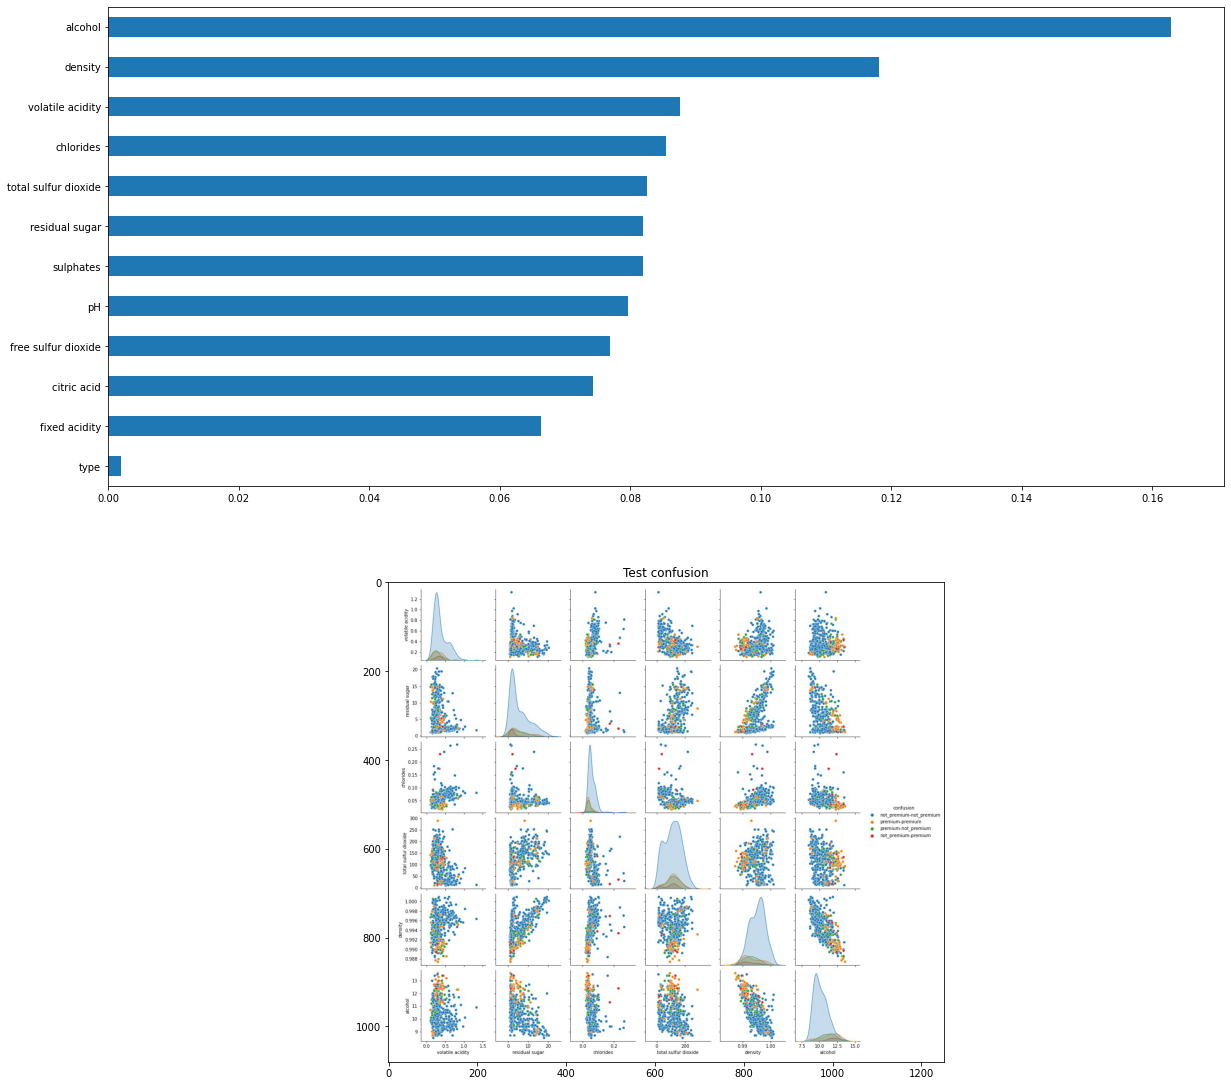

In [ ]:
test_df(df)

max_samples = 0.97
filling fixed acidity
filling fixed acidity as numerical
filling volatile acidity
filling volatile acidity as numerical
filling citric acid
filling citric acid as numerical
filling residual sugar
filling residual sugar as numerical
filling chlorides
filling chlorides as numerical
filling pH
filling pH as numerical
filling sulphates
filling sulphates as numerical
training

[('not_premium', 3653), ('premium', 9834)]

TRAIN:
premium        9834
not_premium    3653
Name: quality, dtype: int64
loss: 0.0156
              precision    recall  f1-score   support

 not_premium       1.00      1.00      1.00      3653
     premium       1.00      1.00      1.00      9834

    accuracy                           1.00     13487
   macro avg       1.00      1.00      1.00     13487
weighted avg       1.00      1.00      1.00     13487



TEST:
not_premium    1567
premium         383
Name: quality, dtype: int64
loss: 0.3017
              precision    recall  f1-score   support

 no

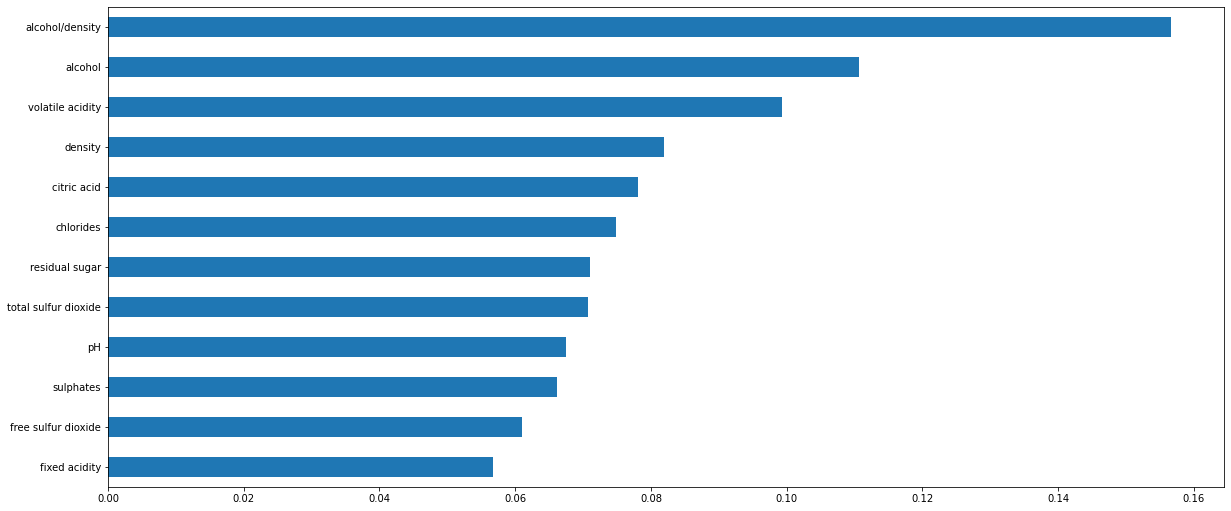

In [ ]:
test_df(df)

max_samples = 0.97
filling fixed acidity
filling fixed acidity as numerical
filling volatile acidity
filling volatile acidity as numerical
filling citric acid
filling citric acid as numerical
filling residual sugar
filling residual sugar as numerical
filling chlorides
filling chlorides as numerical
filling pH
filling pH as numerical
filling sulphates
filling sulphates as numerical
training

[('not_premium', 3653), ('premium', 9834)]

TRAIN:
premium        9834
not_premium    3653
Name: quality, dtype: int64
loss: 0.0298
              precision    recall  f1-score   support

 not_premium       1.00      1.00      1.00      3653
     premium       1.00      1.00      1.00      9834

    accuracy                           1.00     13487
   macro avg       1.00      1.00      1.00     13487
weighted avg       1.00      1.00      1.00     13487



TEST:
not_premium    1567
premium         383
Name: quality, dtype: int64
loss: 0.2871
              precision    recall  f1-score   support

 no

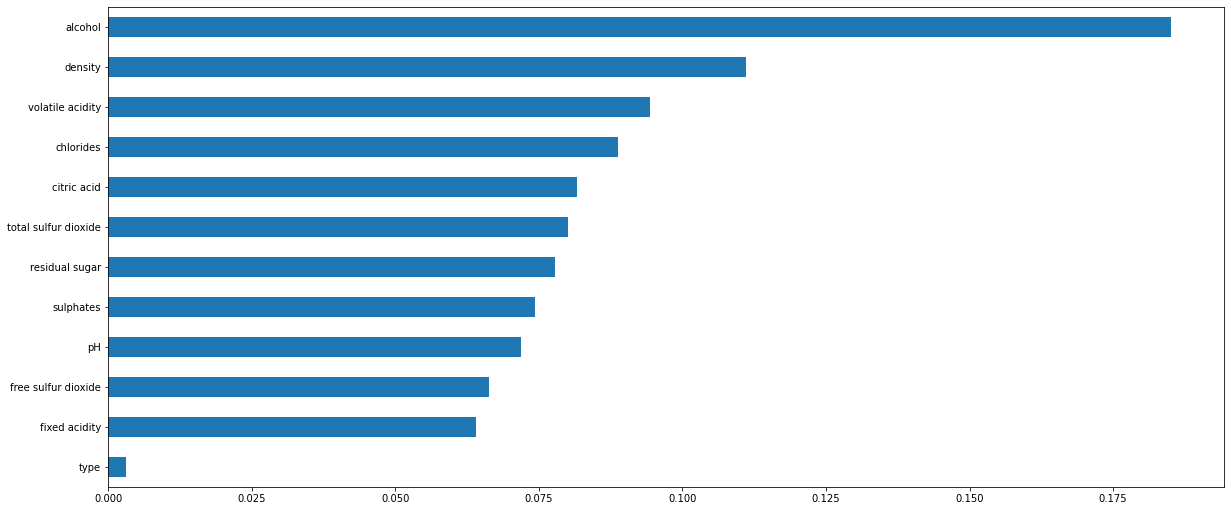

In [ ]:
test_df(df)

In [ ]:
df_white=df[df['type']==0]
df_white.drop(columns='type',inplace=True)
df_white


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,not_premium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,not_premium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,not_premium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not_premium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,not_premium
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,not_premium
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,not_premium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,not_premium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,premium


max_samples = 0.97
training


TRAIN:
not_premium    3053
premium         843
Name: quality, dtype: int64
loss: 0.0819
              precision    recall  f1-score   support

 not_premium       1.00      1.00      1.00      3053
     premium       1.00      1.00      1.00       843

    accuracy                           1.00      3896
   macro avg       1.00      1.00      1.00      3896
weighted avg       1.00      1.00      1.00      3896


dropping less important features from pairplot
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['volatile acidity', 'chlorides', 'free sulfur dioxide', 'density', 'pH',
       'alcohol'],
      dtype='object')

TEST:
not_premium    763
premium        211
Name: quality, dtype: int64
loss: 0.2869
              precision    recall  f1-score   support

 not_premium       0.89      0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:136: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


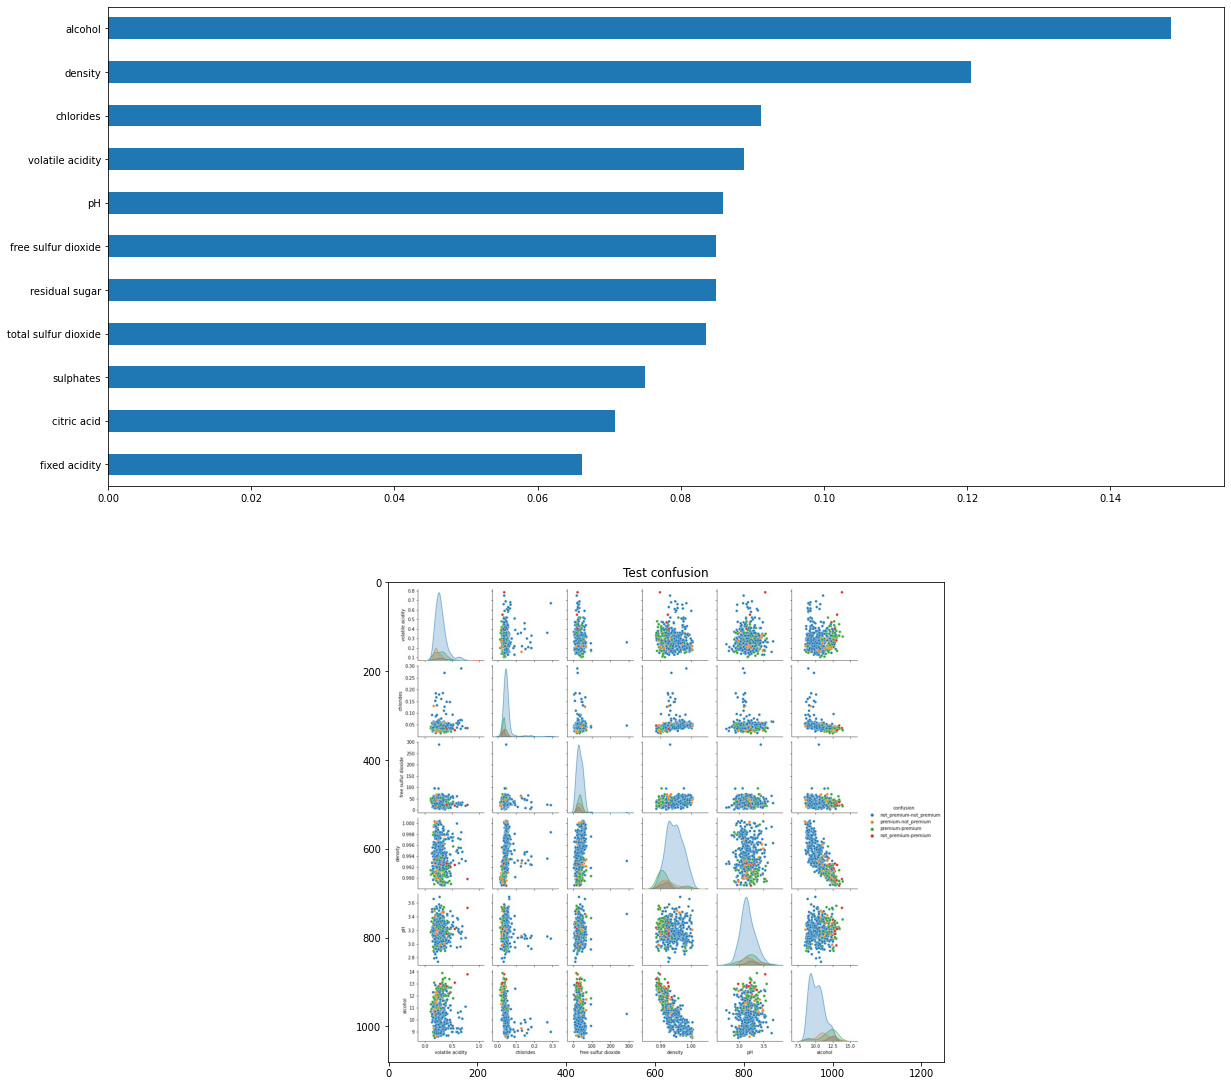

In [ ]:
test_df(df_white.dropna())

In [ ]:
df_red=df[df['type']==1]
df_red.drop(columns='type',inplace=True)
df_red

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,not_premium
4899,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,not_premium
4900,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,not_premium
4901,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,not_premium
4902,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,not_premium
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,not_premium
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,not_premium
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,not_premium
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,not_premium


In [ ]:
test_df(df_red.dropna())

max_samples = 0.97
training


TRAIN:
not_premium    1100
premium         174
Name: quality, dtype: int64
loss: 0.0607
              precision    recall  f1-score   support

 not_premium       1.00      1.00      1.00      1100
     premium       1.00      0.99      1.00       174

    accuracy                           1.00      1274
   macro avg       1.00      1.00      1.00      1274
weighted avg       1.00      1.00      1.00      1274


dropping less important features from pairplot
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

TEST:
not_premium    276
premium         43
Name: quality, dtype: int64
loss: 0.3142
              precision    recall  f1-score   support

 not_premium       0

ValueError: ignored

max_samples = 0.97
filling fixed acidity
filling fixed acidity as numerical
filling volatile acidity
filling volatile acidity as numerical
filling citric acid
filling citric acid as numerical
filling pH
filling pH as numerical
filling sulphates
filling sulphates as numerical
training

[('not_premium', 967), ('premium', 1672)]

TRAIN:
premium        1672
not_premium     967
Name: quality, dtype: int64
loss: 0.0161
              precision    recall  f1-score   support

 not_premium       1.00      1.00      1.00       967
     premium       1.00      1.00      1.00      1672

    accuracy                           1.00      2639
   macro avg       1.00      1.00      1.00      2639
weighted avg       1.00      1.00      1.00      2639



TEST:
not_premium    415
premium         65
Name: quality, dtype: int64
loss: 0.2157
              precision    recall  f1-score   support

 not_premium       0.92      0.97      0.95       415
     premium       0.73      0.46      0.57        65

    a

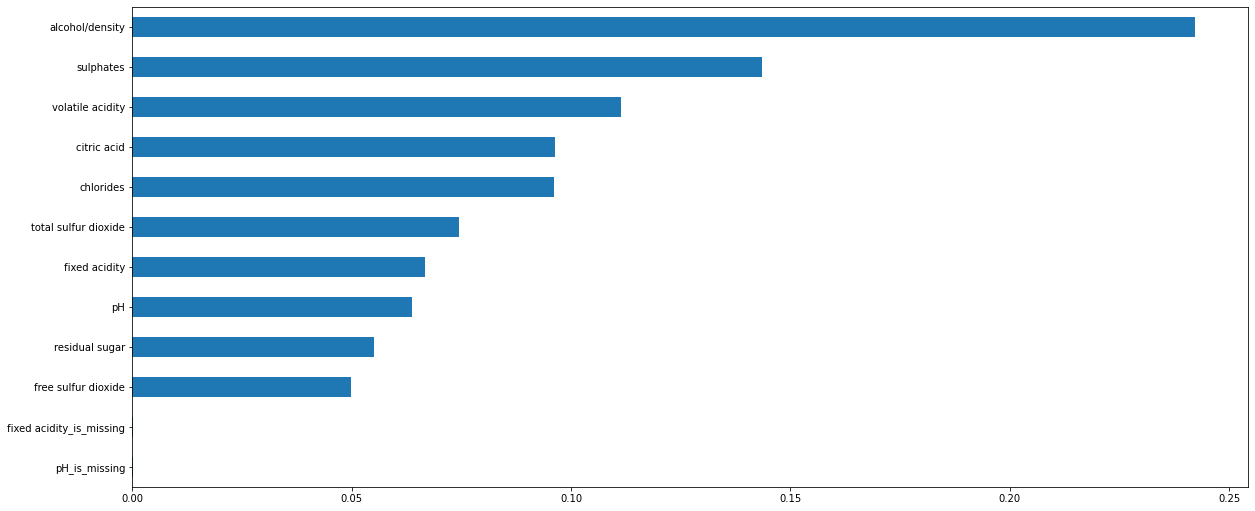

In [ ]:
test_df(df_red.drop(columns=['alcohol','density']))

In [ ]:
df_red=wine[wine['type']=='red']
df_red.quality.value_counts()

In [ ]:
df_red=wine[wine['type']=='red']
df_red.quality.value_counts()


In [ ]:
df['alcohol/density']=df['alcohol']/df['density']
df_eda=df.drop(columns=['alcohol','density'])

max_samples = 0.97
filling fixed acidity
filling fixed acidity as numerical
filling volatile acidity
filling volatile acidity as numerical
filling citric acid
filling citric acid as numerical
filling residual sugar
filling residual sugar as numerical
filling chlorides
filling chlorides as numerical
filling pH
filling pH as numerical
filling sulphates
filling sulphates as numerical
training

[('not_premium', 3653), ('premium', 9834)]

TRAIN:
premium        9834
not_premium    3653
Name: quality, dtype: int64
loss: 0.0156
              precision    recall  f1-score   support

 not_premium       1.00      1.00      1.00      3653
     premium       1.00      1.00      1.00      9834

    accuracy                           1.00     13487
   macro avg       1.00      1.00      1.00     13487
weighted avg       1.00      1.00      1.00     13487



TEST:
not_premium    1567
premium         383
Name: quality, dtype: int64
loss: 0.3030
              precision    recall  f1-score   support

 no

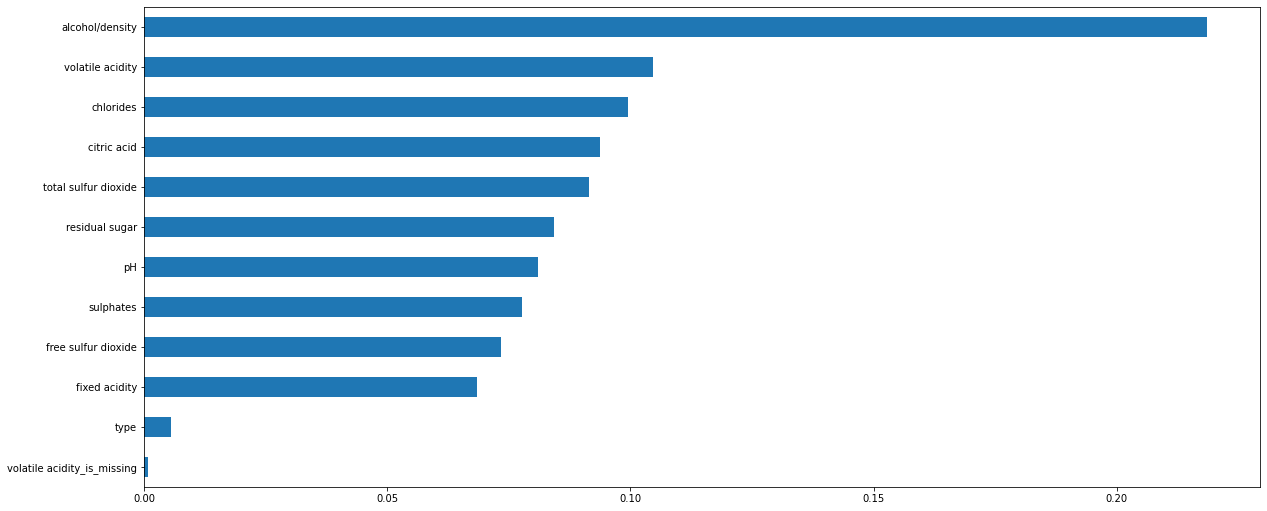

In [ ]:
test_df(df_eda)

In [ ]:
test_df(df)

In [ ]:
err.columns[~err.columns.str.endswith('_is_missing')]


In [ ]:
sns.pairplot(
            data=err[err.columns[~err.columns.str.endswith('_is_missing')]].sample(250),
            hue='confusion'
            )

In [ ]:
err.confusion